# Prediction of online shoppers’ purchasing intention
*by Georgy Lazarev* (**mlcourse slackname: jorgy**)

As the title goes the task was to predict whether the user is intended to make a purchase on Internet shop. Data for this project can be found [here](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers%E2%80%99+Purchasing+Intention+Dataset). 

## Dataset and features description

We have a binary classification problem which measures user intention to finalize transaction. Originally this dataset was used in [research](https://link.springer.com/article/10.1007/s00521-018-3523-0) where there was an attempt to build a system consisting of two modules. The first one is to determine visitor's likelihood to leave the site. If probability of that is higher that set threshold, than the second module should predict whether or not this person has commercial intention. As authors of this paper state data is real and was collected and provided by retailer. Company might be interested in system which in real time can offer a special offer to client with positive commercial intention.

Data formed in such way that each session would correspond to different user in 1 year period to avoid any tendency. 
Target variable is called 'Revenue' and takes two values - 0 and 1, whether or not session ended with purchase.
There are 10 numeric and 7 categorical features:

 ***Numeric:***

*first six features were derived from the URL information of the pages visited by the user. They were updated each time visitor moved from one page to another till the end of the session.* 

 - **Administrative**  - Number of pages about account management visited by person
    
    
 - **Administrative duration** - Total amount of time (in seconds) spent by the visitor on administrative pages  
 
 
 - **Informational**  - Number of pages in session about Web site, communication and address information of the shopping site
 
 
 - **Informational duration** - time (in seconds) spent on informational pages 
 
 
 - **Product related**  - Number of pages concerning product visited
 
 
 - **Product related duration** - time spent on product related pages
 
 
*next three features were  measured by "Google Analytics" for each page in the online-shop website:*


 - **Bounce rate**  - Average bounce rate value of the pages visited by the visitor. Bounce rate itself is percentage of visitors    who enter the site from that page and then leave
 
 
 - **Exit rate**  - Average exit rate value of the pages visited by the visitor. Value of exit rate for page is percentage of all views of this page that were last in the session
 
 
 - **Page value**  - Average page value of the pages visited. Indicates how valuable a specific page is to shop holder in monetary terms
 
 
 
 
 - **Special day**  - Closeness of the site visiting time to a special day. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
 

***Categorical:***

 - **OperatingSystems**  - Operating system of the visitor
 
 
 - **Browser**  - Browser of the visitor 
 
 
 - **Region** - Geographic region from which the session has been started by the visitor
 
 
 - **TrafficType** - Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)
 
 
 - **VisitorType** - whether the visitor is the new or returning (or not specified)
 
 
 - **Weekend**  - Boolean value indicating whether the date of the visit is weekend 
 
 
 - **Month**  - Month value of the visit date 
 
 
 Dataset was formed such way that each session correpsonds to unique person. That was done to prevent any possible trends

## Exploratory data analysis

In [466]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [467]:
#load data
df=pd.read_csv('online_shoppers_intention (1).csv')

In [468]:
df.shape

(12330, 18)

Let's look at dataset:

In [469]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [470]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

There is no missing data in dataset. 

Now let's look at distribution of target value:

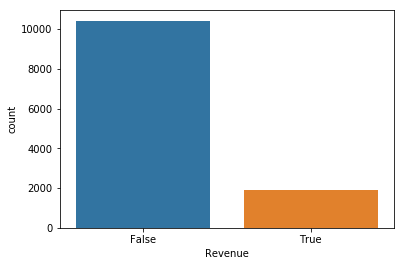

In [472]:
sns.countplot(df.Revenue)

In [473]:
df.Revenue.value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

Seems that we deal with somewhat imbalanced classes. There are more visitors that leave shop website without purchasing anything and that's not surprising.

Target value will be converted to binary type

In [474]:
#list of numeric features
num_feats=['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

In [475]:
df[num_feats].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


We certainly will scale numerical features. As we see they are of different scales

Now let's look at categorical features:

In [476]:
cat_feats=['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend']

In [477]:
df[cat_feats].head()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,Feb,1,1,1,1,Returning_Visitor,False
1,Feb,2,2,1,2,Returning_Visitor,False
2,Feb,4,1,9,3,Returning_Visitor,False
3,Feb,3,2,2,4,Returning_Visitor,False
4,Feb,3,3,1,4,Returning_Visitor,True


As we see, some features are already label-encoded. Some are stll in string format. *Weekend* will be converted to binary.

In [478]:
df[cat_feats].astype('category').describe()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
count,12330,12330,12330,12330,12330,12330,12330
unique,10,8,13,9,20,3,2
top,May,2,2,1,2,Returning_Visitor,False
freq,3364,6601,7961,4780,3913,10551,9462


There are two interesting observations: number of months present and number of visitor types..

In [479]:
df.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

January and April are missing.

In [480]:
df.VisitorType.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

'Other'? Let's see how many such values in our dataset:

In [481]:
df.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

That makes no sense though. We'll get back to that later.

In [482]:
df.groupby('VisitorType')['Revenue'].mean()

VisitorType
New_Visitor          0.249115
Other                0.188235
Returning_Visitor    0.139323
Name: Revenue, dtype: float64

A bit surprising. I expected percentage of potentially beneficial clients would be higher among visitors who returned to website other than new ones. 

In [483]:
sum(df.loc[df.Revenue==1].Administrative==0)

514

In [484]:
sum(df.loc[df.Revenue==1].Informational==0)

1295

In [485]:
sum(df.loc[df.Revenue==1].ProductRelated==0)

6

That makes sense. Only six people made purchase and at the same time din't visit any pages related to products.

In [486]:
(df.Administrative==0).sum()

5768

In [487]:
(df.Administrative_Duration==0).sum()

5903

So, there were cases when number of pages was greater than 0 but time spent was 0.

In [488]:
df.loc[df.Administrative>0].loc[df.Administrative_Duration==0].Administrative.value_counts()

1    131
2      4
Name: Administrative, dtype: int64

So theoretically it is possible.

*Special day* feature shows closeness to ..special days, right. We might think that this feature will positively affect target value

In [489]:
df.loc[df.SpecialDay>0].Revenue.value_counts(normalize=True)

False    0.938449
True     0.061551
Name: Revenue, dtype: float64

How come? That's again not what I expected. 

In [490]:
df[['Revenue','SpecialDay']].corr()

,Revenue,SpecialDay
Revenue,1.000000,-0.082305
SpecialDay,-0.082305,1.000000


That's actualy strange..

## Primary visual data analysis

Here goes pairwise Pearson-correlation of numerical features:

In [491]:
corrl=num_feats.copy()
corrl.append('Revenue')

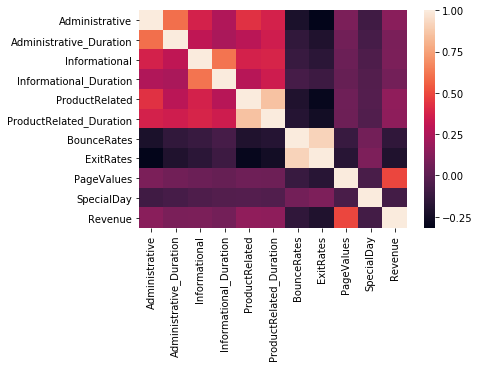

In [492]:
sns.heatmap(df[corrl].corr())

Yes, some features indeed are highly correlated!

In [376]:
df[['ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates']].corr()

,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates
ProductRelated,1.000000,0.860927,-0.204578,-0.292526
ProductRelated_Duration,0.860927,1.000000,-0.184541,-0.251984
BounceRates,-0.204578,-0.184541,1.000000,0.913004
ExitRates,-0.292526,-0.251984,0.913004,1.000000


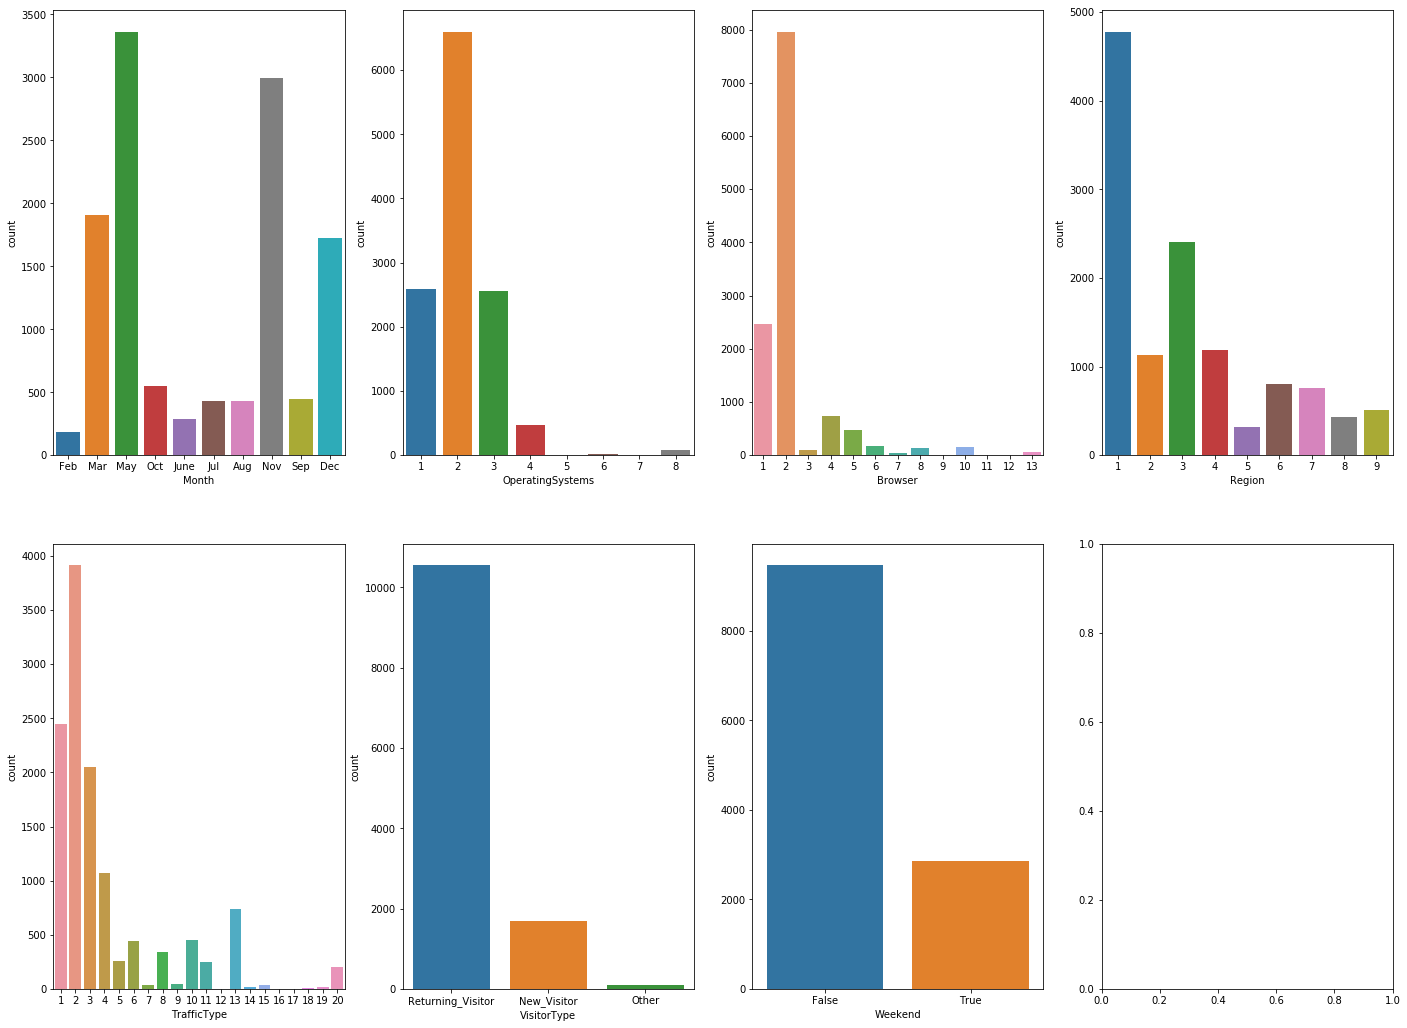

In [377]:
fig, axes = plt.subplots(ncols=4, nrows = 2, figsize=(24, 18))
for i in range(len(cat_feats)):
    sns.countplot(df[cat_feats[i]],ax=axes[i//4, i%4])

Well, I'd say it's difficult to draw any concrete conclusions from this plot. There are leaders in each groups .
Now let's explore some features a bit more with respect to target value:

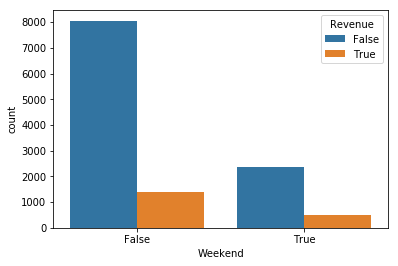

In [378]:
sns.countplot(df.Weekend,hue=df.Revenue)

plt.figure(figsize=(15,15))
plt.subplot(321)
df.groupby('Month').Revenue.mean().plot.bar()
plt.subplot(322)
df.groupby('Browser').Revenue.mean().plot.bar()
plt.subplot(323)
df.groupby('TrafficType').Revenue.mean().plot.bar()
plt.subplot(324)
df.groupby('OperatingSystems').Revenue.mean().plot.bar()

Percentage of visitors who made purchases in November seems a bit higher in comparison to other months. In February there was a small number of visitors and too few of them ended up buying something. Maybe it was bad advertising and price policy that was a reason

As for other features distribution of session results is consistent, as it seems. It's difficult to interpret those result in a sense that feature values are encoded by LavelEncoding already so we don't really know which real meanings stand behind them. Yep.

In [295]:
tmp=['Revenue','Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']

In [32]:
r=['Revenue','Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']

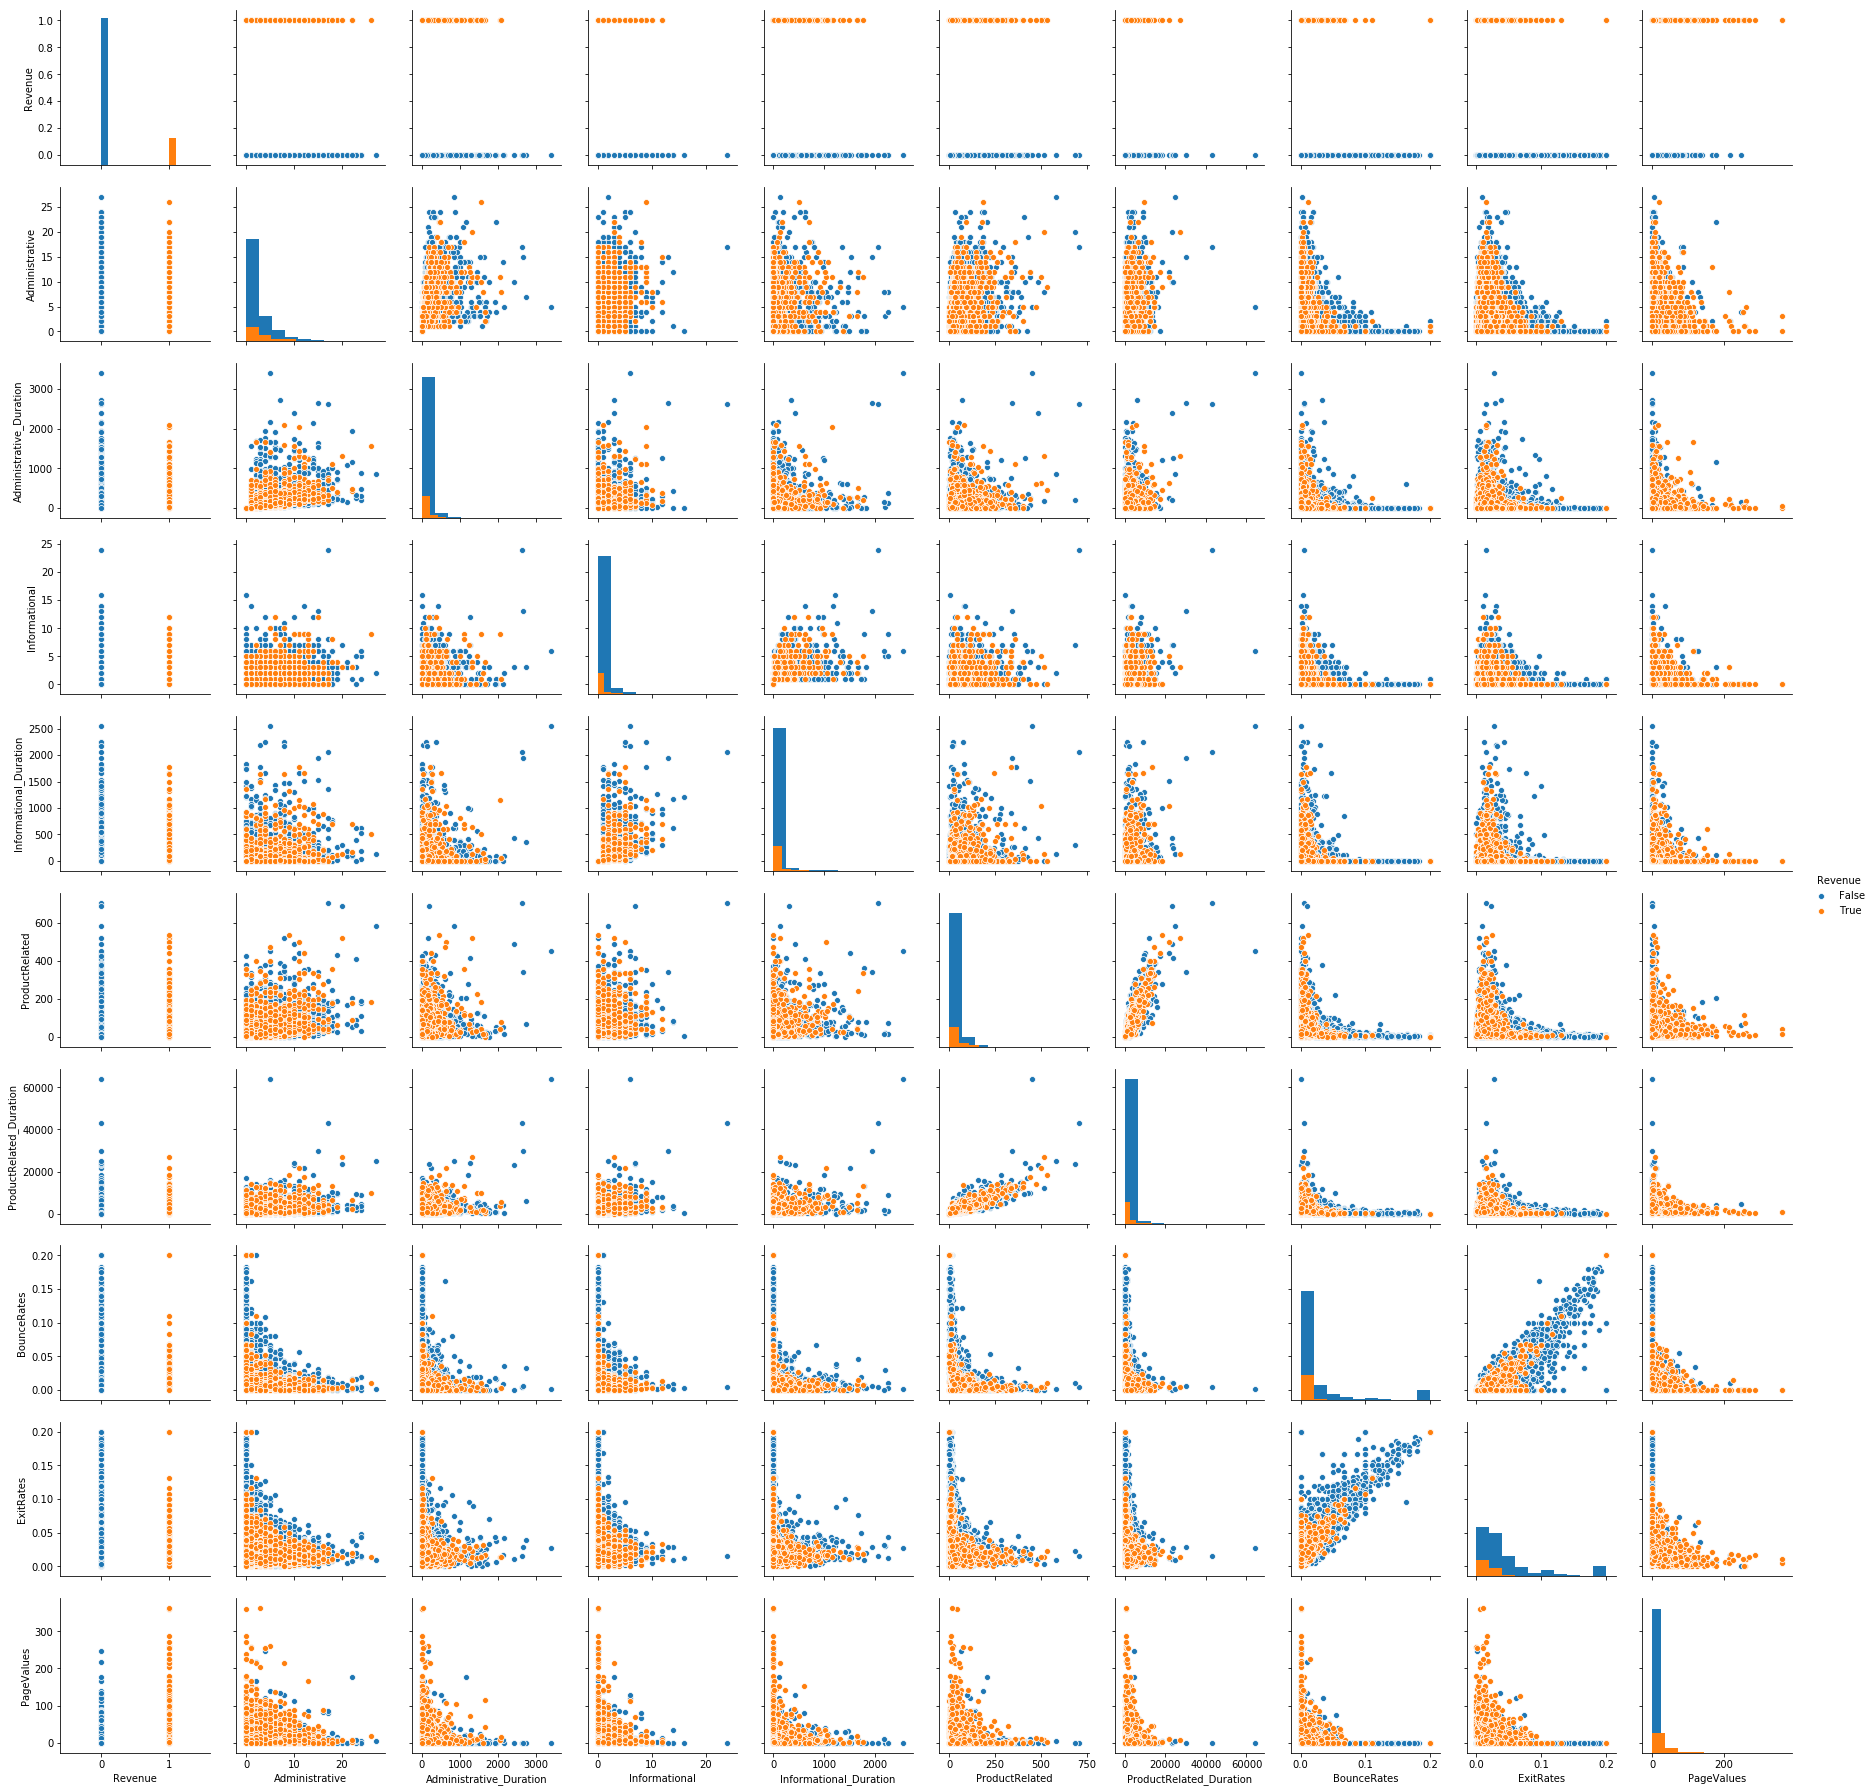

In [33]:
sns.pairplot(df[r],hue='Revenue',diag_kind='hist')

In general, trends here make sense. Lower Bounce and Exit Rates corresponds to more frequent transactions made. On the other hand higher PageValues not always lead to commercial benefit. Also in most distributions and pairplots related to website pages we see cases where visitor spent too much time on website but still quit it without purchase. That happens in real life too. Thus, as for outliers, I guess I can assume there is no such.

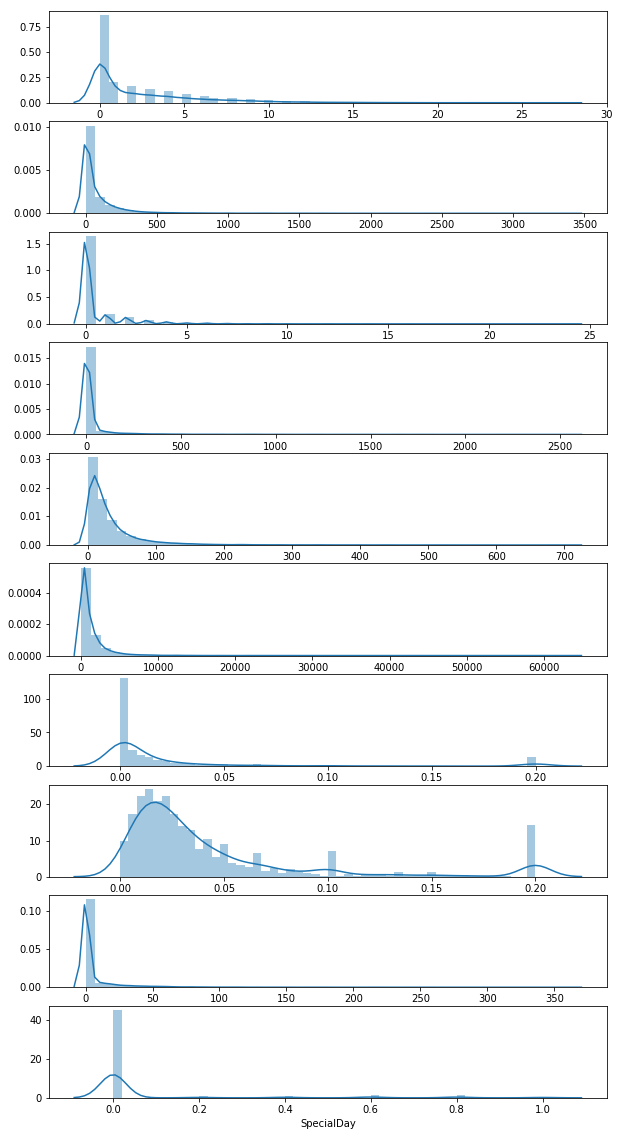

In [34]:
plt.figure(figsize=(10,20))   
for i,v in enumerate(range(len(num_feats))):
    v = v+1
    ax1 = plt.subplot(len(num_feats),1,v)
    ax1=sns.distplot(df[num_feats[i]])

Right-skewed. All of them.

## Insights and found dependencies

1. There is no sessions recorded for January and April. By numbers it seems that in November&October bigger percentage of sessions ended up with purchases. 
2. At the same time SpecialDay feature is shows negative effect on target value. We can explain it but assuming that most visitor prefer to shop in advance. 
3. There are two pairs of highly correlated features. It's worth checking later if deleting them will improve our models.
4. Almost 25% percent of new visitors made transactions in contrast to ~14% of returning ones. 
5. Also we have 85 instances which have VisitorType as 'Other'. As there are no sensible options except New and Returning, this fact does mean that information wasn't correctly derived. As this is only 0.6894% of the whole data , let's take a deep breath and drop these instances away.
6. I got an impression that all features are right-skewed. It can be useful later to do a log transformation.

## Metric choice

As we are dealing with imbalanced class accuracy is not the best option. Due to task specificty company doesn't want to miss potential buyers. So the cost of showing the cliend special offer is lower than loss of left visitors aimed to make an purchase.
Moreover, it is a good idea to not depend on threshold for making decision about class. Probabilities for class can be considered as intention scores and so special offers can be adjusted to degree of visitor intention. So ROC AUC seems pretty nice for our task.

## Model Choice

Following models were selected:
- Logistic Regression - classic and interpretable. We'll do OHE for categorical features and scale numeric.
- Random Forest - tree based model in contrast to LR, worth trying (we have categorical features as well as numerical). No need for OHE and scaling. 
- XGBoost Classifier - because why not? 

## Data preprocessing 

In [493]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

First, we'll convert to boolean features to binary type

In [494]:
df[['Weekend','Revenue']]=df[['Weekend','Revenue']].apply(lambda x:x.astype(int))

Then instances with *VisitorType* as 'Returning Visitor" will be droped away:

In [495]:
df=df.drop(df.loc[df.VisitorType=='Other'].index)

In [496]:
df.shape

(12245, 18)

In [497]:
vt=df.VisitorType.map({'New_Visitor':0,'Returning_Visitor':1})

There will be different prepocessing as we work with models based on different approaches.

For logistic regression it's a good idea to scale our numeric features and do One_Hot Encoding on categorical ones. To avoid data leakage scaling will be done after splitting data. As for OHE and LabelEncoding (for tree based models), I suppose we can do it before splitting as we know range of all possible values of categorical features, so there is no data leakage to prevent.

In [498]:
dummies=pd.concat([pd.get_dummies(df.Month,drop_first=True),
                   pd.get_dummies(df.Browser,drop_first=True,prefix='Browser'),
                   pd.get_dummies(df.Region,drop_first=True,prefix='Region'),
                   pd.get_dummies(df.OperatingSystems,drop_first=True,prefix='OS'),
                   pd.get_dummies(df.TrafficType,drop_first=True,prefix='TT')],axis=1)

In [499]:
dummies.shape

(12245, 55)

In [500]:
target=df.Revenue

*feats_logreg* will contain all features for Logistic Regression. *feats_tb* is for tree-based models 

In [501]:
feats_logreg=pd.concat([df[num_feats],dummies,df['Weekend'],vt],axis=1)

In [502]:
feats_logreg.shape

(12245, 67)

Now we'll split our data.  *stratify* used due to imbalance in classes.

In [503]:
X_train_logreg_,X_test_logreg_,y_train_logreg,y_test_logreg=train_test_split(feats_logreg,
                                        target,test_size=0.3,random_state=17,stratify=target)

Let's check distribution of classes in train and test sets:

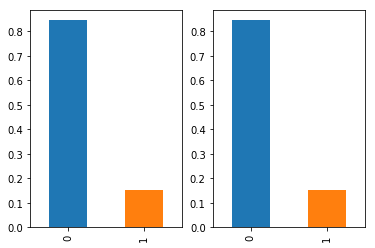

In [504]:
plt.subplot(121)
y_train_logreg.value_counts(normalize=True).plot.bar()
plt.subplot(122)
y_test_logreg.value_counts(normalize=True).plot.bar()

Yep, that seems right.

Now test set will be split into two same-sized sets: one for validation and other for final test. We won't test our models on second one until the end.

In [505]:
X_valid_logreg_,X_test_logreg_,y_valid_logreg,y_test_logreg=train_test_split(X_test_logreg_,
                                                            y_test_logreg,test_size=0.5,random_state=17)

In [506]:
scaler=StandardScaler()

In [507]:
X_train_logreg=X_train_logreg_.copy(deep=True)
X_valid_logreg=X_valid_logreg_.copy(deep=True)
X_test_logreg=X_test_logreg_.copy(deep=True)


X_train_logreg[num_feats]=scaler.fit_transform(X_train_logreg[num_feats])
X_valid_logreg[num_feats]=scaler.transform(X_valid_logreg[num_feats])
X_test_logreg[num_feats]=scaler.transform(X_valid_logreg[num_feats])

In [508]:
X_train_logreg.shape

(8571, 67)

For tree based models our preprocessing will include only LabelEncoding of *month*. Other Categorical features except boolean one are already label-encoded. Splitting into ***3*** sets is the same.

In [509]:
from sklearn.preprocessing import LabelEncoder

In [510]:
le=LabelEncoder()

In [511]:
feats_tb=pd.concat([df[num_feats],df[['Weekend','TrafficType','OperatingSystems','Browser','Region']],vt],axis=1)

In [512]:
feats_tb['month_enc']=le.fit_transform(df.Month)

In [513]:
feats_tb.shape

(12245, 17)

Let's split our data. *stratify* used due to imbalance in classes.

In [514]:
X_train_tb,X_test_tb,y_train_tb,y_test_tb=train_test_split(feats_tb,
                                        target,test_size=0.3,random_state=17,stratify=target)

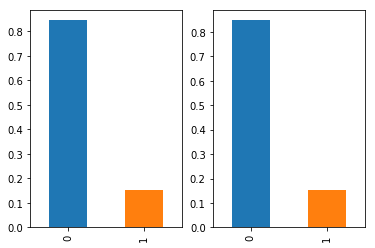

In [515]:
plt.subplot(121)
y_train_tb.value_counts(normalize=True).plot.bar()
plt.subplot(122)
y_valid_tb.value_counts(normalize=True).plot.bar()

In [516]:
X_valid_tb,X_test_tb,y_valid_tb,y_test_tb=train_test_split(X_test_tb,
                                        y_test_tb,test_size=0.5,random_state=17)

## Cross-validation and adjustment of model hyperparameters

In [517]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

We'll use Statified cross validation again due to imbalanced classes. 

In [518]:
skf=StratifiedKFold(n_splits=5,random_state=17)

### Logistic Regression

Let's at first train a basic LogReg without tuning hyperparametes, creating new features to establish sort of baseline:

In [523]:
pr_lr=LogisticRegression(class_weight='balanced')

In [524]:
pr_lr.fit(X_train_logreg_,y_train_logreg)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [525]:
print('Mean ROC-AUC on cross-validation:', np.mean(cross_val_score(pr_lr,X_train_logreg_,y_train_logreg,scoring='roc_auc',cv=skf)))

Mean ROC-AUC on cross-validation: 0.906150828125375


In [526]:
print('ROC AUC on valid set :', roc_auc_score(y_valid_logreg,pr_lr.predict_proba(X_valid_logreg_)[:,1]))

ROC AUC on valid set : 0.8958688870538583


#### Tuning hyperparameters

In [527]:
param_grid={ 'C':np.logspace(-2,1,7), 'class_weight':[None, 'balanced']}

In [528]:
gs = GridSearchCV(pr_lr, param_grid, scoring='roc_auc', n_jobs=-1, cv=skf)

In [529]:
gs.fit(X_train_logreg_,y_train_logreg)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([ 0.01   ,  0.03162,  0.1    ,  0.31623,  1.     ,  3.16228,
       10.     ]), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [530]:
display(gs.best_params_)
display(gs.best_score_)

{'C': 0.01, 'class_weight': 'balanced'}

0.9107838786836139

Now I'd select more narrow range for *C*:

In [531]:
gs = GridSearchCV(pr_lr, {'C':np.linspace(0.05,0.2,10),'class_weight':['balanced']}, scoring='roc_auc', n_jobs=-1, cv=skf)

In [532]:
gs.fit(X_train_logreg_,y_train_logreg)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([0.05   , 0.06667, 0.08333, 0.1    , 0.11667, 0.13333, 0.15   ,
       0.16667, 0.18333, 0.2    ]), 'class_weight': ['balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [533]:
print('Best found parameters for LogReg:',gs.best_params_)
print('Best score found for LogReg with GridSearch:',gs.best_score_)

Best found parameters for LogReg: {'C': 0.05, 'class_weight': 'balanced'}
Best score found for LogReg with GridSearch: 0.908072694501513


In [534]:
print('ROC AUC on valid set :', roc_auc_score(y_valid_logreg,gs.predict_proba(X_valid_logreg_)[:,1]))

ROC AUC on valid set : 0.8975502339664191


Increased. ~0.002

***Oversampling minority class***

This is known technique to handle imbalanced class and implemented in ***imbalanced-learn*** [package](https://imbalanced-learn.readthedocs.io/en/stable/). We'll just create new synthetic data instance corresponding to '1' class.

In [535]:
from imblearn.over_sampling import SMOTE

I'm going to check whether oversampling improves LR perfomance

In [536]:
%%time
best_params=[]
best_scores=[]
rocs=[]
for d in np.linspace(0.4,1,5):
    sm=SMOTE(sampling_strategy=d,random_state=17)
    X_train_logreg_res, y_train_logreg_res = sm.fit_sample(X_train_logreg, y_train_logreg)
    lr=LogisticRegression()
    lr.fit(X_train_logreg_res,y_train_logreg_res)
    gs=GridSearchCV(lr, {'C':np.linspace(0.05,1,11)}, scoring='roc_auc', n_jobs=-1, cv=skf)
    gs.fit(X_train_logreg_res,y_train_logreg_res)
    best_params.append(gs.best_params_)
    best_scores.append(gs.best_score_)
    rocs.append(roc_auc_score(y_valid_logreg,gs.predict_proba(X_valid_logreg)[:,1]))

Wall time: 22.7 s


In [537]:
max(best_scores)

0.9188984823824035

In [538]:
max(rocs)

0.8845559225617029

LogReg doesn't perfoms better after oversamling so we won't use it.

### Random Forest

For this and for XGBoost we use data with postfix *tb* (tree-based). Data is not scaled, categorical features are Label-encoded.

In [539]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [540]:
rfc=RandomForestClassifier()

In [541]:
rfc.fit(X_train_tb,y_train_tb)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [542]:
roc_auc_score(y_valid_tb,rfc.predict_proba(X_valid_tb)[:,1])

0.8952908523717772

Time for gridsearch:

In [543]:
param_grid = {
    "n_estimators": [500],
    "max_depth": [4,5,10,15],
    "min_samples_split": [2,3],
    "min_samples_leaf": [2], #,1,3],
    'max_features': [1,'auto','log2'], 
    'criterion': ['gini'] }

In [544]:
gs = GridSearchCV(rfc, param_grid, scoring='roc_auc', n_jobs=-1, cv=skf, verbose=1)

In [545]:
%%time
gs.fit(X_train_tb, y_train_tb)
print('Best parameters for Random Forest: ', gs.best_params_)
print('Best score: ', gs.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.8min finished


Best parameters for Random Forest:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Best score:  0.9267264909725439
Wall time: 1min 54s


In [546]:
roc_auc_score(y_valid_tb,gs.predict_proba(X_valid_tb)[:,1])

0.9259106340031196

Seems much better. Will XGBoost beat this?

We'll save best RandomForest version for future reference

In [547]:
rfc=gs.best_estimator_

In [548]:
rfc.fit(X_train_tb,y_train_tb)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### XGBoost Classifier

In [549]:
from xgboost import XGBClassifier

In [550]:
xgbclf = XGBClassifier(random_state=17, n_jobs=-1)

In [551]:
xgbclf.fit(X_train_tb,y_train_tb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=17, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [552]:
roc_auc_score(y_valid_tb,xgbclf.predict_proba(X_valid_tb)[:,1])

0.9299809615561061

In [553]:
param_grid = {
    'max_depth': [2,3,4,5], 
    'n_estimators': [50,100,150,300], 
    'learning_rate':[0.01,0.05,0.1], 
    'reg_alpha': [0, 0.1, 0.2],
    'gamma': [0,1]
}

In [554]:
gs = GridSearchCV(xgbclf, param_grid, scoring='roc_auc', n_jobs=-1, cv=skf, verbose=1)

In [555]:
%%time
gs.fit(X_train_tb, y_train_tb)
print('Best parameters for XGBBoost Classifier: ', gs.best_params_)
print('Best scorefor XGBBoost Classifier: ', gs.best_score_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  8.9min finished


Best parameters for XGBBoost Classifier:  {'gamma': 1, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 150, 'reg_alpha': 0.1}
Best scorefor XGBBoost Classifier:  0.9320928044076774
Wall time: 8min 58s


In [556]:
roc_auc_score(y_valid_tb,gs.predict_proba(X_valid_tb)[:,1])

0.9284590329388017

Bit worse.

Ok, basic XGBoost without tuning shows better results among 3 models.  But there is room for improvements in case for Logistic Regression so we'll get back to it once more.

### Logistic Regression 2.0

As you might remember, all our numeric features are right skewed, so let's see if log transformation will improve our model perfomance.  *_lt* stands for log-transformation

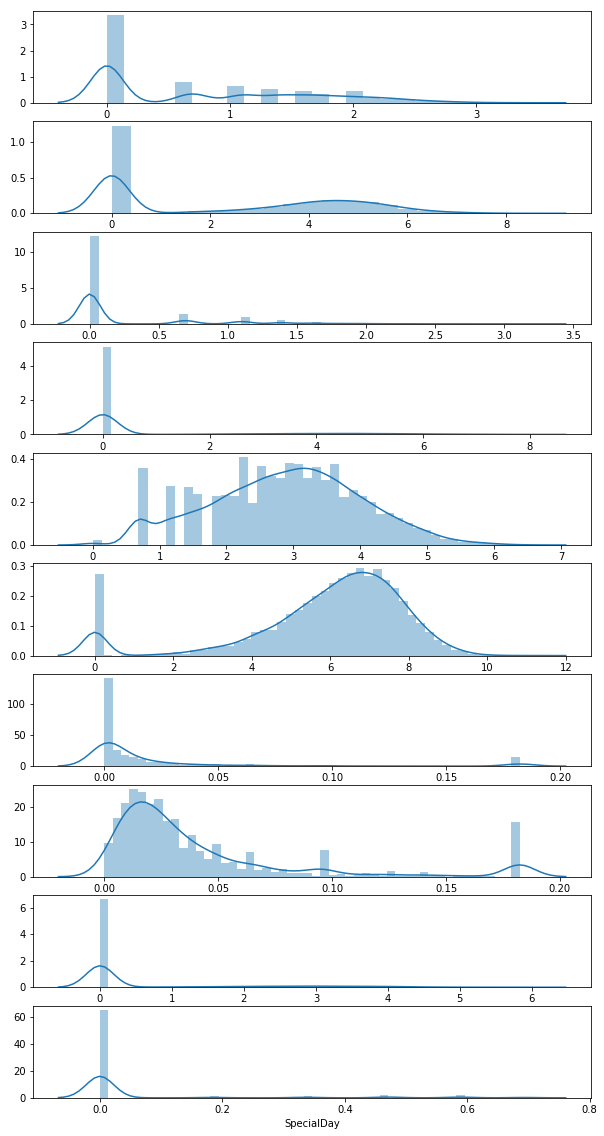

In [212]:
plt.figure(figsize=(10,20))   
for i,v in enumerate(range(len(num_feats))):
    v = v+1
    ax1 = plt.subplot(len(num_feats),1,v)
    ax1=sns.distplot(np.log1p(df[num_feats[i]]))

That's better.

In [557]:
#we'll do transformation over a copy of dataset. '_' stands for version before scaling
X_train_logreg_lt=X_train_logreg_.copy(deep=True)
X_valid_logreg_lt=X_valid_logreg_.copy(deep=True)
X_test_logreg_lt=X_test_logreg_.copy(deep=True)

In [558]:
X_train_logreg_lt[num_feats]=np.log1p(X_train_logreg_lt[num_feats])
X_valid_logreg_lt[num_feats]=np.log1p(X_valid_logreg_lt[num_feats])
X_test_logreg_lt[num_feats]=np.log1p(X_test_logreg_lt[num_feats])

X_train_logreg_lt[num_feats]=scaler.fit_transform(X_train_logreg_lt[num_feats])
X_valid_logreg_lt[num_feats]=scaler.transform(X_valid_logreg_lt[num_feats])
X_test_logreg_lt[num_feats]=scaler.transform(X_test_logreg_lt[num_feats])

In [559]:
lr=LogisticRegression(class_weight='balanced',C=0.05)

In [560]:
lr.fit(X_train_logreg_lt,y_train_logreg)

LogisticRegression(C=0.05, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [561]:
print('Mean ROC AUC on dataset after Log tansformation of numeric features',
      np.mean(cross_val_score(lr,X_train_logreg_lt,y_train_logreg,scoring='roc_auc',cv=skf)))

Mean ROC AUC on dataset after Log tansformation of numeric features 0.92213060167621


In [562]:
print('ROC AUC on valid set',roc_auc_score(y_valid_logreg,lr.predict_proba(X_valid_logreg_lt)[:,1]))

ROC AUC on valid set 0.9089251307459401


That's a quite  an improvement (~1.3%!!! :-))  in comparison with very first basic LogReg before gridsearch (~0.895). We'll keep transformed dataset for further exploration.

***Feature selection***

There were two pairs of highly correlated numerical features = *ProductRelated - ProductRelated_Duration* and *BounceRates - ExitRates*. Maybe deleting them will improve model.

In [563]:
#we'll make again a transformation on copy
X_train_logreg_copy=X_train_logreg_lt.copy(deep=True)
X_valid_logreg_copy=X_valid_logreg_lt.copy(deep=True)
X_test_logreg_copy=X_test_logreg_lt.copy(deep=True)

X_train_logreg_copy.drop(['ProductRelated','BounceRates'],axis=1,inplace=True)
X_valid_logreg_copy.drop(['ProductRelated','BounceRates'],axis=1,inplace=True)
X_test_logreg_copy.drop(['ProductRelated','BounceRates'],axis=1,inplace=True)

In [564]:
lr=LogisticRegression(class_weight='balanced',C=0.05)

In [565]:
lr.fit(X_train_logreg_copy,y_train_logreg)

LogisticRegression(C=0.05, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [566]:
print('Mean ROC AUC on dataset after deleting "ProductRelated" and "BounceRates"',np.mean(cross_val_score(lr,X_train_logreg_copy,y_train_logreg,scoring='roc_auc',cv=skf)))

Mean ROC AUC on dataset after deleting "ProductRelated" and "BounceRates" 0.9220570843876438


In [567]:
print('ROC AUC on valid set',roc_auc_score(y_valid_logreg,lr.predict_proba(X_valid_logreg_copy)[:,1]))

ROC AUC on valid set 0.9072483714102211


Results in cross validation hasn't changed, but slighly decreased in hold-out validation. It's not quite clear what should be done so we'll keep the old version.
Let's refer to our RandomForest and XGBoost models and see which features were the least important.

In [568]:
feat_names=['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration',
 'BounceRates','ExitRates','PageValues','SpecialDay','Weekend','TrafficType','OperatingSystems','Browser','Region','VisitorType',
           'month']

In [569]:
rfc_feat_imp=dict(zip(feat_names, rfc.feature_importances_))
xgb_feat_imp=dict(zip(feat_names, xgbclf.feature_importances_))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

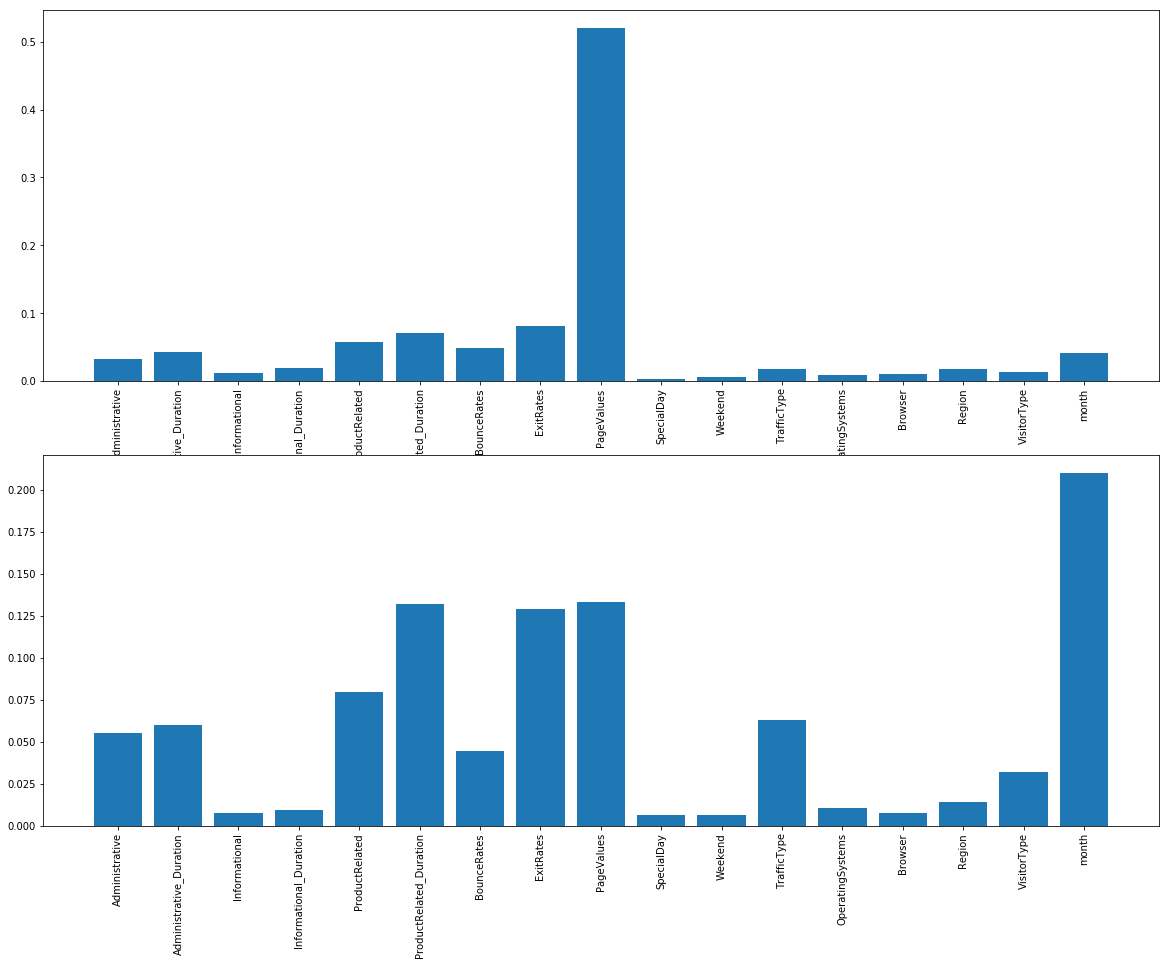

In [570]:
plt.figure(figsize=(20,15))
plt.subplot(211)
plt.bar(range(len(feat_names)),list(rfc_feat_imp.values()),tick_label=list(rfc_feat_imp.keys()))
plt.xticks(rotation=90)
plt.subplot(212)
plt.bar(range(len(feat_names)),list(xgb_feat_imp.values()),tick_label=list(xgb_feat_imp.keys()))
plt.xticks(rotation=90)

We'll drop *Informational_Duration*, *SpecialDay*, *Weekend*, *Browser* and *OperatingSystems* (well, dummy columns for last two)

In [571]:
X_train_logreg_copy=X_train_logreg_lt.copy(deep=True)
X_valid_logreg_copy=X_valid_logreg_lt.copy(deep=True)
X_test_logreg_copy=X_test_logreg_lt.copy(deep=True)

In [572]:
X_train_logreg_copy.drop(['Informational_Duration','Weekend','Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13','OS_2', 'OS_3', 'OS_4',
       'OS_5', 'OS_6', 'OS_7', 'OS_8','Region_2', 'Region_3', 'Region_4', 'Region_5',
       'Region_6', 'Region_7', 'Region_8', 'Region_9',],axis=1,inplace=True)

X_valid_logreg_copy.drop(['Informational_Duration','Weekend','Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13','OS_2', 'OS_3', 'OS_4',
       'OS_5', 'OS_6', 'OS_7', 'OS_8','Region_2', 'Region_3', 'Region_4', 'Region_5',
       'Region_6', 'Region_7', 'Region_8', 'Region_9',],axis=1,inplace=True)
X_test_logreg_copy.drop(['Informational_Duration','Weekend','Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13','OS_2', 'OS_3', 'OS_4',
       'OS_5', 'OS_6', 'OS_7', 'OS_8','Region_2', 'Region_3', 'Region_4', 'Region_5',
       'Region_6', 'Region_7', 'Region_8', 'Region_9'],axis=1,inplace=True)

In [573]:
lr=LogisticRegression(class_weight='balanced',C=0.1)

In [574]:
lr.fit(X_train_logreg_copy,y_train_logreg)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [575]:
np.mean(cross_val_score(lr,X_train_logreg_copy,y_train_logreg,scoring='roc_auc',cv=skf))

0.9223630036597591

In [576]:
roc_auc_score(y_valid_logreg,lr.predict_proba(X_valid_logreg_copy)[:,1])

0.9102188274153591

Getting rid of five least important (from RandomForestClassifier perspective) gave a little improvement in our logistic regreesion perfomance. But it's still not close to Forest or XGboost Classifier.

In [577]:
gs = GridSearchCV(lr, {'C':np.logspace(-2,1,10)}, scoring='roc_auc', n_jobs=-1, cv=skf)

In [578]:
gs.fit(X_train_logreg_copy,y_train_logreg)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([ 0.01   ,  0.02154,  0.04642,  0.1    ,  0.21544,  0.46416,
        1.     ,  2.15443,  4.64159, 10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [579]:
gs.best_score_

0.9223689712602932

In [580]:
print('ROC AUC on valid set :', roc_auc_score(y_valid_logreg,gs.predict_proba(X_valid_logreg_copy)[:,1]))

ROC AUC on valid set : 0.9102486466648316


In [581]:
lr=gs.best_estimator_

Well, ok. We can make conclusion that this now is the best version of Logistic Regression. 
Log-transformation and feature selection based on tree-based models were right solutions, while deleting two the most correlated features - not. 

XGBoost is the best model by now, Logistic Regression is the worst yet. We'll keep those all for experiments with engineering new features.

## Creation of new features and description of this process

### Logistic Regression

So I'd try to make several interaction features by myself and see what will happen. Intuitively I suppose that feature showing amount of time visitor spends on ProductRelated pages with the fact that visitor already was there might be useful for determining this visitor's intention. Interaction between VisitorType and PageValues might be important too (PageValues itself is quite important as we could see on previous plots)

In [582]:
#_wn = with new features
X_train_logreg_wn=X_train_logreg_copy.copy(deep=True)
X_valid_logreg_wn=X_valid_logreg_copy.copy(deep=True)
X_test_logreg_wn=X_test_logreg_copy.copy(deep=True)

In [583]:
X_train_logreg_wn['interfeat1']=X_train_logreg_wn.VisitorType*X_train_logreg_wn.ProductRelated
X_valid_logreg_wn['interfeat1']=X_valid_logreg_wn.VisitorType*X_valid_logreg_wn.ProductRelated
X_test_logreg_wn['interfeat1']=X_test_logreg_wn.VisitorType*X_test_logreg_wn.ProductRelated

X_train_logreg_wn['condfeat1']=X_train_logreg_wn.VisitorType*X_train_logreg_wn.PageValues
X_valid_logreg_wn['condfeat1']=X_valid_logreg_wn.VisitorType*X_valid_logreg_wn.PageValues
X_test_logreg_wn['condfeat1']=X_test_logreg_wn.VisitorType*X_test_logreg_wn.PageValues

In [584]:
lr.fit(X_train_logreg_wn,y_train_logreg)

LogisticRegression(C=0.21544346900318834, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [585]:
tmp_train=X_train_logreg_wn.copy(deep=True)
tmp_valid=X_valid_logreg_wn.copy(deep=True)
tmp_test=X_test_logreg_wn.copy(deep=True)

In [586]:
print('ROC AUC on valid set :', roc_auc_score(y_valid_logreg,lr.predict_proba(X_valid_logreg_wn)[:,1]))

ROC AUC on valid set : 0.9117717221763465


Again too small but improvement

Now let's try to generate interaction features using [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). Then we'll select the most important ones.

In [587]:
from sklearn.preprocessing import PolynomialFeatures

In [588]:
polfeat = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [589]:
polfeats_train=pd.DataFrame(polfeat.fit_transform(X_train_logreg_wn))
polfeats_valid=pd.DataFrame(polfeat.fit_transform(X_valid_logreg_wn))
polfeats_test=pd.DataFrame(polfeat.transform(X_test_logreg_wn))

In [590]:
polfeats_train.shape

(8571, 820)

I'll fit XGboost Classifier on those 820 features to see which features were the most important from its prespective.

In [591]:
xg=XGBClassifier()
xg.fit(polfeats_train,y_train_logreg)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

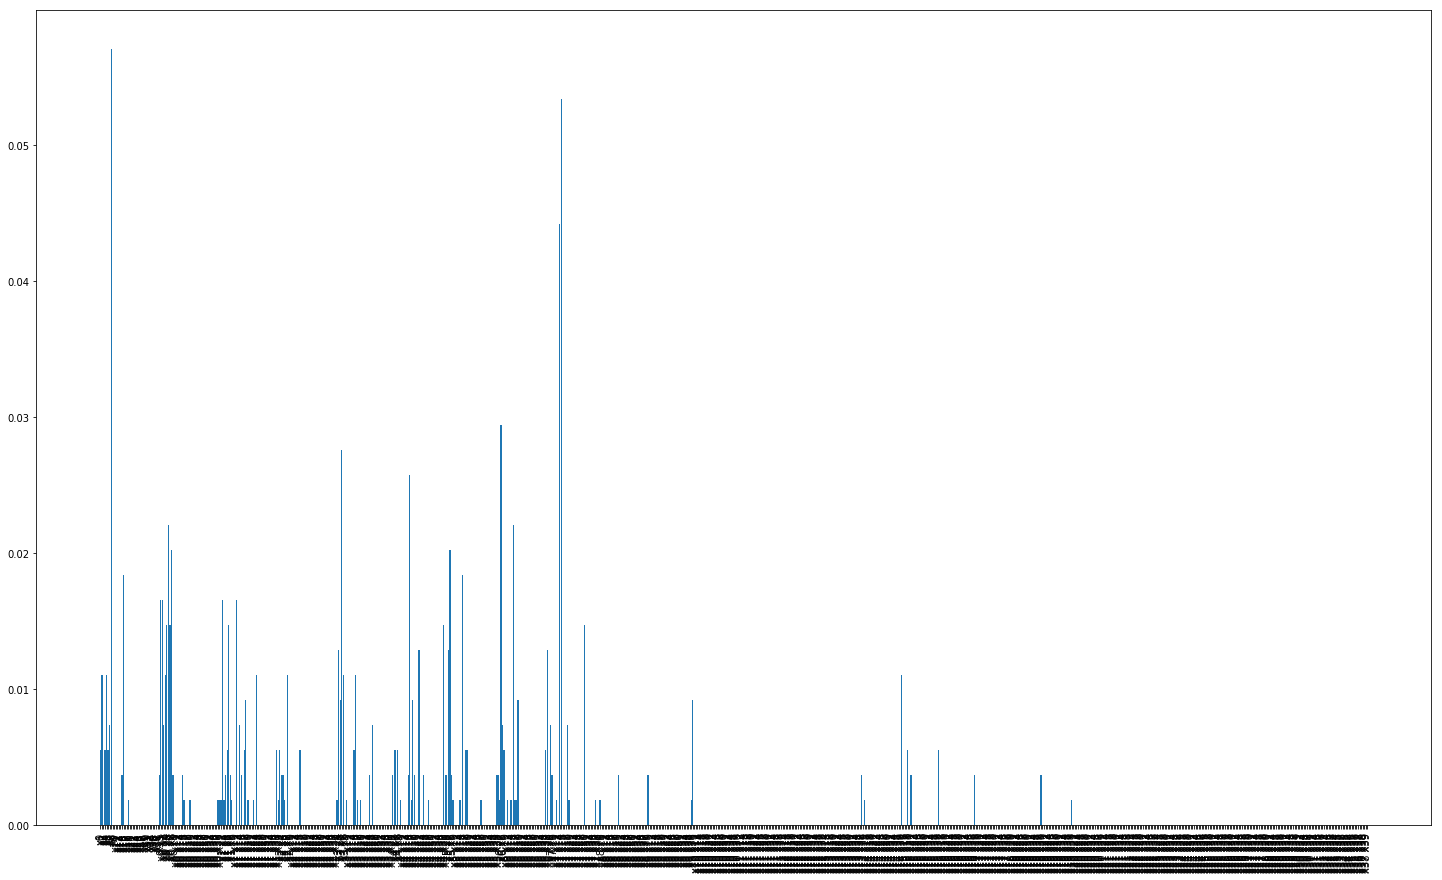

In [592]:
plt.figure(figsize=(25,15))
plt.bar(range(820),list(xg.feature_importances_),tick_label=polfeat.get_feature_names())
plt.xticks(rotation=90)

Yep, the feature names are not readable. I'll print ***10*** most important features.

In [593]:
xg_imp_2=dict(list(zip(polfeat.get_feature_names(),xg.feature_importances_)))

In [594]:
sorted(xg_imp_2.items(), key=lambda x: x[1], reverse=True)[:10]

[('x7', 0.057090238),
 ('x7 x14', 0.053407),
 ('x7 x13', 0.044198897),
 ('x6 x7', 0.02946593),
 ('x3 x6', 0.027624309),
 ('x4 x15', 0.02578269),
 ('x0 x5', 0.022099448),
 ('x6 x15', 0.022099448),
 ('x0 x7', 0.020257827),
 ('x5 x7', 0.020257827)]

In [595]:
dict(zip(polfeat.get_feature_names()[:38],X_train_logreg_wn.columns))

{'x0': 'Administrative',
 'x1': 'Administrative_Duration',
 'x10': 'Feb',
 'x11': 'Jul',
 'x12': 'June',
 'x13': 'Mar',
 'x14': 'May',
 'x15': 'Nov',
 'x16': 'Oct',
 'x17': 'Sep',
 'x18': 'TT_2',
 'x19': 'TT_3',
 'x2': 'Informational',
 'x20': 'TT_4',
 'x21': 'TT_5',
 'x22': 'TT_6',
 'x23': 'TT_7',
 'x24': 'TT_8',
 'x25': 'TT_9',
 'x26': 'TT_10',
 'x27': 'TT_11',
 'x28': 'TT_12',
 'x29': 'TT_13',
 'x3': 'ProductRelated',
 'x30': 'TT_14',
 'x31': 'TT_15',
 'x32': 'TT_16',
 'x33': 'TT_17',
 'x34': 'TT_18',
 'x35': 'TT_19',
 'x36': 'TT_20',
 'x37': 'VisitorType',
 'x4': 'ProductRelated_Duration',
 'x5': 'BounceRates',
 'x6': 'ExitRates',
 'x7': 'PageValues',
 'x8': 'SpecialDay',
 'x9': 'Dec'}

In [596]:
X_train_logreg_wn['x7 x13']=X_train_logreg_wn.PageValues*X_train_logreg_wn.Mar
X_valid_logreg_wn['x7 x13']=X_valid_logreg_wn.PageValues*X_valid_logreg_wn.Mar
X_test_logreg_wn['x7x13']=X_test_logreg_wn.PageValues*X_test_logreg_wn.Mar


X_train_logreg_wn['x3 x6']=X_train_logreg_wn.ProductRelated*X_train_logreg_wn.ExitRates
X_valid_logreg_wn['x3 x6']=X_valid_logreg_wn.ProductRelated*X_valid_logreg_wn.ExitRates
X_test_logreg_wn['x3 x6']=X_test_logreg_wn.ProductRelated*X_test_logreg_wn.ExitRates


X_train_logreg_wn['x7 x14']=X_train_logreg_wn.PageValues*X_train_logreg_wn.May
X_valid_logreg_wn['x7 x14']=X_valid_logreg_wn.PageValues*X_valid_logreg_wn.May
X_test_logreg_wn['x7 x14']=X_test_logreg_wn.PageValues*X_test_logreg_wn.May


X_train_logreg_wn['x6 x7']=X_train_logreg_wn.PageValues*X_train_logreg_wn.ExitRates
X_valid_logreg_wn['x6 x7']=X_valid_logreg_wn.PageValues*X_valid_logreg_wn.ExitRates
X_test_logreg_wn['x6 x7']=X_test_logreg_wn.PageValues*X_test_logreg_wn.ExitRates


X_train_logreg_wn['x0 x7']=X_train_logreg_wn.Administrative*X_train_logreg_wn.ExitRates
X_valid_logreg_wn['x0 x7']=X_valid_logreg_wn.Administrative*X_valid_logreg_wn.ExitRates
X_test_logreg_wn['x0 x7']=X_test_logreg_wn.Administrative*X_test_logreg_wn.ExitRates


X_train_logreg_wn['x4 x7']=X_train_logreg_copy.ProductRelated_Duration*X_train_logreg_wn.PageValues
X_valid_logreg_wn['x4 x7']=X_valid_logreg_copy.ProductRelated_Duration*X_valid_logreg_wn.PageValues
X_test_logreg_wn['x4 x7']=X_test_logreg_wn.ProductRelated_Duration*X_test_logreg_wn.PageValues


X_train_logreg_wn['x4 x15']=X_train_logreg_copy.ProductRelated*X_train_logreg_wn.Nov
X_valid_logreg_wn['x4 x15']=X_valid_logreg_copy.ProductRelated*X_valid_logreg_wn.Nov
X_test_logreg_wn['x4 x15']=X_test_logreg_wn.ProductRelated*X_test_logreg_wn.Nov


The feature added *below* was made up intuitively.

In [597]:
X_train_logreg_wn['condfeat2']=(X_train_logreg_wn.ProductRelated_Duration>1).astype(int)
X_valid_logreg_wn['condfeat2']=(X_valid_logreg_wn.ProductRelated_Duration>1).astype(int)
X_test_logreg_wn['condfeat2']=(X_test_logreg_wn.ProductRelated_Duration>1).astype(int)

We can also see sort of importance by referring to ***lr*** attribute *coef_*

In [598]:
X_valid_logreg_copy.shape

(1837, 38)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

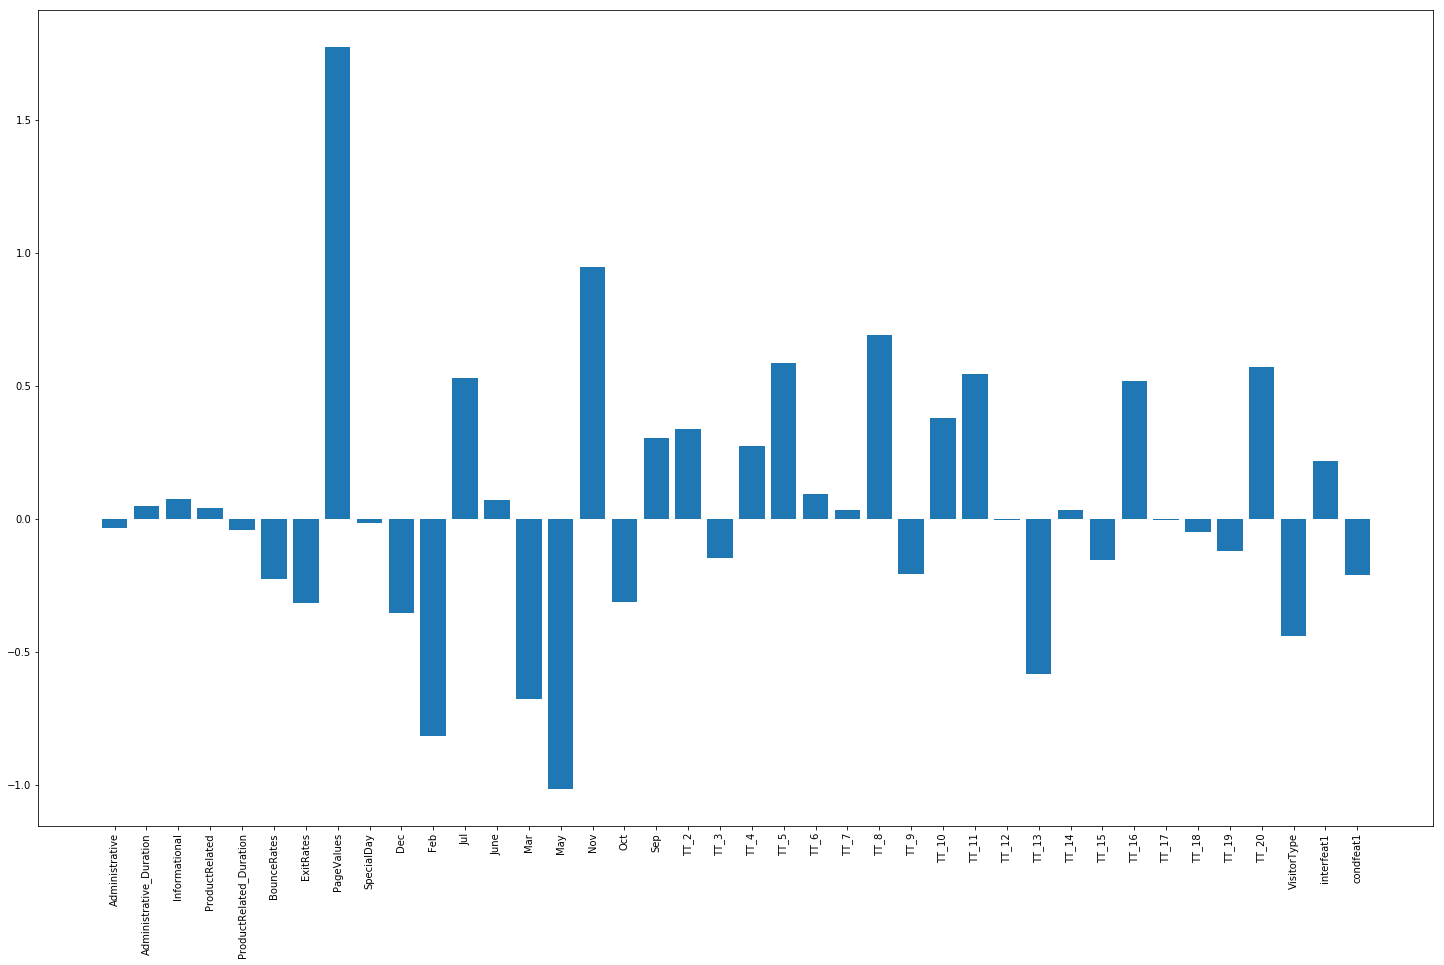

In [599]:
plt.figure(figsize=(25,15))
plt.bar(range(40),list(lr.coef_[0]),tick_label=list(tmp_train.columns))
plt.xticks(rotation=90)

Deleting some columns:

In [600]:
X_train_logreg_wn.drop(['TT_14','TT_17','TT_7','TT_12','TT_18','TT_19','TT_9','TT_15','TT_6','TT_4','June','Oct'],axis=1,inplace=True)
X_valid_logreg_wn.drop(['TT_14','TT_17','TT_7','TT_12','TT_18','TT_19','TT_9','TT_15','TT_6','TT_4','June','Oct'],axis=1,inplace=True)
X_test_logreg_wn.drop(['TT_14','TT_17','TT_7','TT_12','TT_18','TT_19','TT_9','TT_15','TT_6','TT_4','June','Oct'],axis=1,inplace=True)

In [601]:
X_train_logreg_wn.drop(['ExitRates','Informational','Administrative_Duration','ProductRelated_Duration'],axis=1,inplace=True)
X_valid_logreg_wn.drop(['ExitRates','Informational','Administrative_Duration','ProductRelated_Duration'],axis=1,inplace=True)
X_test_logreg_wn.drop(['ExitRates','Informational','Administrative_Duration','ProductRelated_Duration'],axis=1,inplace=True)

In [602]:
lr=LogisticRegression(C=0.1,class_weight='balanced')

In [603]:
lr.fit(X_train_logreg_wn,y_train_logreg)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [604]:
print('ROC AUC on valid-out set :', roc_auc_score(y_valid_logreg,lr.predict_proba(X_valid_logreg_wn)[:,1]))

ROC AUC on valid-out set : 0.9184351775392238


Our feature engineering improved model approximately by ~0.8%

# *Part without name*

Actually RandomForest and XGBoost Classifier showed better ROC AUC score but fitting and tuning Logistic Regression is much faster. Now suppose we have an optimal threshold established by retail company *=0.5*. Out of curiosity I decided to check recall score:

In [605]:
from sklearn.metrics import recall_score

In [624]:
print('Random Forest Classifier recognised %f %% of all visitor who have purchasing intention higher that 0.5' 
      % (100*recall_score(y_test_tb,rfc.predict(X_test_tb))))

Random Forest Classifier recognised 55.208333% of all visitor who have purchasing intention higher that 0.5


In [626]:
print('XGBoost Classifier recognised %f %% of all visitor who have purchasing intention higher that 0.5'
      % (100*recall_score(y_test_tb,xgbclf.predict(X_test_tb))))

XGBoost Classifier recognised 59.027778 % of all visitor who have purchasing intention higher that 0.5


In [660]:
print('Logistic Regression recognised %f %% of all visitor who have purchasing intention higher that 0.5'
      % (100*recall_score(y_test_logreg,lr.predict(X_test_logreg_wn))))

Logistic Regression recognised 82.986111 % of all visitor who have purchasing intention higher that 0.5


## Plotting training and validation curves

In [628]:
from sklearn.model_selection import learning_curve,validation_curve

In [629]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("ROC AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<Figure size 720x504 with 0 Axes>

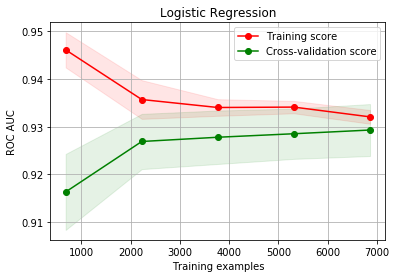

In [630]:
plt.figure(figsize=(10, 7))
plot_learning_curve(lr, 'Logistic Regression', X_train_logreg_wn, y_train_logreg, cv=skf, n_jobs=-1);

We observe a good thing - training cross-validation curves have tend to converge. No underfitting.

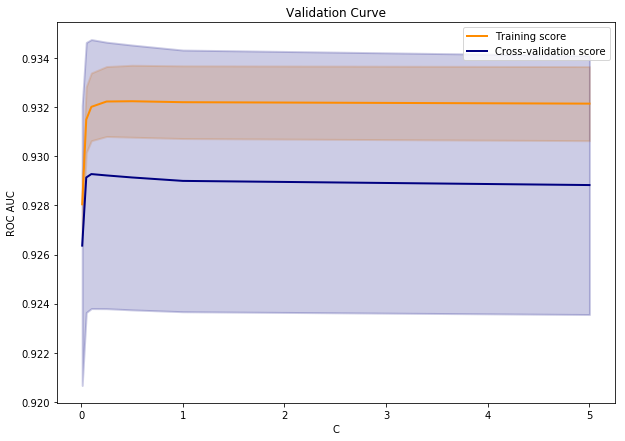

In [633]:
plt.figure(figsize=(10,7))
param_range=np.array([0.01, 0.05, 0.1, 0.25, 0.5, 1, 5])
train_scores, test_scores = validation_curve(lr, X_train_logreg_wn, y_train_logreg, param_name="C",
                                             param_range=param_range, cv=skf, scoring="roc_auc", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve")
plt.xlabel("C")
plt.ylabel("ROC AUC")
#plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

So our scores pretty much consistent along the *C* range. Though ROC AUC drastically rised with *C* increasing from *0* to *~0.4*

## Prediction for test or hold-out samples

Now it's time to make predictions on ***test*** set. This one which we created at the beginning and transformed each with *train* and *valid* but haven't used that.

And before that, we can fit our model on ***train***+***valid***

**RandomForest**

In [634]:
X_train_tb_fin=pd.concat([X_train_tb,X_valid_tb],axis=0)
y_train_tb_fin=pd.concat([y_train_tb,y_valid_tb],axis=0)

In [637]:
%%time
rfc.fit(X_train_tb_fin,y_train_tb_fin)

Wall time: 7.86 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [638]:
print('ROC AUC on test set :', roc_auc_score(y_test_tb,rfc.predict_proba(X_test_tb)[:,1]))

ROC AUC on test set : 0.9351844379886665


**XGBoost Clasiffier**

In [639]:
%%time
xgbclf.fit(X_train_tb_fin,y_train_tb_fin)

Wall time: 1.51 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=17, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [640]:
print('ROC AUC on test set :', roc_auc_score(y_test_tb,xgbclf.predict_proba(X_test_tb)[:,1]))

ROC AUC on test set : 0.9361449591134064


**Logistic Regression**

In [641]:
X_train_logreg_wn.shape

(8571, 32)

In [642]:
X_valid_logreg_wn.shape

(1837, 32)

In [643]:
X_train_logreg_fin=pd.concat([X_train_logreg_wn,X_valid_logreg_wn],axis=0)
y_train_logreg_fin=pd.concat([y_train_logreg,y_valid_logreg],axis=0)

In [655]:
X_train_logreg_fin.shape

(10408, 32)

In [654]:
y_train_logreg_fin.shape

(10408,)

In [650]:
y_test_logreg.shape

(1837,)

In [656]:
lr.fit(X_train_logreg_fin,y_train_logreg_fin)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [659]:
print('ROC AUC on test set :', roc_auc_score(y_test_logreg,lr.predict_proba(X_test_logreg_wn)[:,1]))

ROC AUC on test set : 0.924433774478158


Results are even higher than on ***valid*** set. 

## Conclusions 

So this is the end. We used three model on imbalanced data and each of them showed quite a high ROC AUC score. We could observe that score on valid set changed in accordance to *cross_val_score*. 
I'd stick to Logistic Regression. You could notice this by last parts of project. Moreover, I feel like it could be done more in case of RandomForest and XGBoost.

When integrated with other module to determine likelihood of visitor to leave the site (I mentioned in the beginning), company can use this classification model to show individual special offers to such visitors before they leave shop website.


- Data was collected during one year and we have a feature *Month*. So basically we have sort of timeline. However I used *Month* solely as a categorical feature without any time context. And I'm not sure the opposite would make any sense.

- Feature selection and engineering helped a bit to increase LogReg score. Except experimenting with visualizations I don't see further way to improve this process. Oversampling didn't help (but didn't worsen too).

- As for choosing parameters range: I'm very new to this so I don't have much experience in tuning models. So I just make range of values close to default or just select a wide but small range first and then iterate over bigger amount of values in choosen smaller areas that seems optimal. Parameter grids used in code above is what I came to after some time. Hyperparameters tuning definitely needs wiser approach.

- It's also an interesting idea to build online learning system which could be updated with each new example.

## Thank you for attention!